<a href="https://colab.research.google.com/github/Ray-Aldred/Jordan-Peterson-Sentiment-Analysis/blob/main/Jordan_Peterson_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
!pip install nltk
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.9 MB/s eta 0:00:00


# **Introduction**

## **What is sentimental analysis?**

Sentiment analysis is the process of identifying and categorizing subjective information within text data, such as opinions, attitudes, and emotions. It involves the use of natural language processing (NLP) techniques to extract and analyze the sentiment expressed in a given piece of text, which can be a social media post, product review, or news article, among others. The aim of sentiment analysis is to gain insights into how people perceive a particular topic or entity, which can be useful for various applications, such as market research, brand reputation management, and customer service. Sentiment analysis models can classify text data into positive, negative, or neutral sentiments, or use more granular sentiment scales. However, since language is complex and context-dependent, sentiment analysis is not a perfect science, and its accuracy can vary depending on the quality of the training data, the language used, and the type of text being analyzed.

## **Why do a Jordan Peterson sentimental analysis?** 
Jordan Peterson, a distinguished Canadian clinical psychologist, professor, and public intellectual, gained recognition in the mid-2010s for his contributions on various cultural and political issues. He first garnered attention for his opposition to Canada's Bill C-16, which he argued would limit free speech by requiring the use of preferred gender pronouns to include gender identity and gender expression as prohibited grounds for discrimination. However, critics dispute this interpretation, and his perspectives on gender identity and transgender rights have resulted in accusations of transphobia.

Since 2010, Peterson has amassed a substantial online following that includes fervent supporters and ardent detractors. This has intensified the discourse surrounding his ideas, reinforcing his controversial reputation. Peterson's work emphasizes traditional values and structures, which some view as regressive or patriarchal. He also critiques "radical leftist ideologies" and what he perceives as "neo-Marxism" in academia and society as a whole, although some object to the accuracy of his characterizations.

Undertaking sentiment analysis on Peterson can offer valuable insights into audience responses, polarization, emerging trends, and topic-specific reactions. By analyzing the sentiments associated with his tweets and statements, us can gain a deeper understanding of the public's reactions to his work, pinpoint contentious aspects, and identify shifts in sentiment and emerging controversies. Sentiment analysis can also expose which topics evoke the strongest emotional responses, helping us determine which aspects of his work resonate most deeply with various segments of his audience.

Ultimately, sentiment analysis of Jordan Peterson's work provides a powerful analytical tool for understanding the dynamics of public opinion, where passionate viewpoints and emotions often collide. By embracing the insights this tool provides, we can strive for a more informed and nuanced engagement with his perspectives that help shape our world, for better or worse.

# **1. Importing Libraries** 

In [2]:
#@title
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **2. Loading Data**

In [3]:
#@title
df = pd.read_csv('/content/jordanbpeterson_tweets.csv')
df.head()

,id,created_at,text,likes
0,1653809937028460556,2023-05-03 17:13:09+00:00,Destroying confused children so that the sadis...,2730
1,1653809453488123923,2023-05-03 17:11:14+00:00,Mandatory celebration. Just in time for Pride ...,268
2,1653809170490044454,2023-05-03 17:10:07+00:00,It is to laugh https://t.co/jD4K7Wkz7T https:/...,301
3,1653808969750655002,2023-05-03 17:09:19+00:00,":) in the navy, you'll sail the seven seas\n\n...",456
4,1653808731791011840,2023-05-03 17:08:22+00:00,Keep it up. Woke capitalism: the worst of gree...,548


In [4]:
#@title
df.tail()

,id,created_at,text,likes
3181,1629401619602317312,2023-02-25 08:43:13+00:00,RT @songpinganq: Chinese police facial recogni...,0
3182,1629401218802909184,2023-02-25 08:41:38+00:00,"RT @NetZeroWatch: @VivekGRamaswamy, presidenti...",0
3183,1629399724397658118,2023-02-25 08:35:41+00:00,RT @gunsnrosesgirl3: Look at this moth from th...,0
3184,1629399248528711682,2023-02-25 08:33:48+00:00,Oh look! The West's most authoritarian institu...,540
3185,1629398280575614977,2023-02-25 08:29:57+00:00,FNB: Feature Not Bug https://t.co/PD6zjWDHBX,427


# **3. Cleaning The Data**

In [5]:
#@title
# Call the `info()` function on the DataFrame `df` to get a summary of its content
# The summary includes information about the columns, data types, and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3186 non-null   int64 
 1   created_at  3186 non-null   object
 2   text        3186 non-null   object
 3   likes       3186 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 99.7+ KB


In [6]:
#@title
# check for missing or null values in each cell
df.isnull().sum()

id            0
created_at    0
text          0
likes         0
dtype: int64

In [7]:
#@title
# Call the `drop()` function on the DataFrame `df` to remove the specified columns
# The `axis=1` parameter indicates that the function should operate on columns, not rows (axis=0 would operate on rows)
# The resulting DataFrame, with the specified columns removed, is assigned to a new variable called `text_df`
text_df = df.drop(['id', 'created_at', 'likes'], axis=1)
text_df.head()

,text
0,Destroying confused children so that the sadis...
1,Mandatory celebration. Just in time for Pride ...
2,It is to laugh https://t.co/jD4K7Wkz7T https:/...
3,":) in the navy, you'll sail the seven seas\n\n..."
4,Keep it up. Woke capitalism: the worst of gree...


### **Preprocessioning the data** 

In [8]:
#@title
# Define a function called `data_processing` that takes a single input parameter `text`
def data_processing(text):
    # Convert the input text to lowercase
    text = text.lower()
    
    # Remove URLs from the text using a regular expression (regex)
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags from the text using regex
    text = re.sub(r'\@w+|\#', '', text)
    
    # Remove punctuation from the text using regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text into individual words using the `word_tokenize` function from the NLTK library
    text_tokens = word_tokenize(text)
    
    # Filter out stopwords from the tokenized words including filtering out 'rt'
    # `stop_words` is assumed to be a predefined set or list of common words to be excluded from analysis
    filtered_text = [w for w in text_tokens if not w in stop_words and w != 'rt']
    
    # Join the filtered words back into a single string, separated by spaces, and return the result
    return " ".join(filtered_text)

In [9]:
#@title
# This applies the `data_processing` function to each element in the 'text' column
# The result is a cleaned and preprocessed version of the text data in each row of the column
text_df.text = text_df['text'].apply(data_processing)
text_df.head()

,text
0,destroying confused children sadists enjoy nar...
1,mandatory celebration time pride season maysep...
2,laugh
3,navy youll sail seven seas navy navy
4,keep woke capitalism worst greed meets worst m...


In [10]:
#@title
# Instantiate a PorterStemmer object from the NLTK library
stemmer = PorterStemmer()

# Define a function called `stemming` that takes a single input parameter `data`
def stemming(data):
    # Tokenize the input text into individual words
    words = word_tokenize(data)
    
    # Stem each word in the tokenized list
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text


In [11]:
#@title
# The result is a version of the text data in each row of the column with words reduced to their stemmed (root) forms
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [12]:
#@title
text_df.head()

,text
0,destroy confus children sadist enjoy narcissis...
1,mandatori celebr time pride season maysept cas...
2,laugh
3,navi youll sail seven sea navi navi
4,keep woke capit worst greed meet worst marxism


# **4. A Deeper Sentiment Analysis with RoBERTa**
Introduced in 2019, RoBERTa is a sophisticated masked language model that has captivated the field of natural language processing. As an extension of the widely acclaimed Bidirectional Encoder Representations from Transformers (BERT) model, RoBERTa was expertly crafted by the dedicated team at Facebook AI Research (FAIR).

Built on a monumental scale, RoBERTa harnesses the power of diverse and abundant training data, meticulously sourced from a myriad of books, articles, and websites. Its innovative approach, which employs "dynamic word masking," has elevated the model's performance in a multitude of downstream tasks, making it a remarkable tool in the realm of NLP.

RoBERTa's exceptional abilities have not only led it to excel in an array of NLP challenges but have also enabled it to surpass its predecessor, BERT, in multiple benchmarks. This is exemplified by its extraordinary achievements on the GLUE and SuperGLUE leaderboards.

However, RoBERTa is not without its shortcomings. The model's immense size and computational demands pose significant challenges for training and deployment, requiring considerable resources to effectively utilize its full potential.

In summary, RoBERTa is a trailblazing language model that has remarkably advanced the state of the art in natural language processing, becoming a cornerstone of innovation and progress within the field.

## **Why choose RoBERTa for semtimental analysis?**

RoBERTa's pre-training is done on a massive corpus of data, including the BooksCorpus and Wikipedia, which helps to capture a broad range of linguistic structures and patterns. Additionally, it employs a unique pre-training methodology that involves larger batch sizes, longer sequences, and dynamic masking. This approach improves the model's ability to capture more subtle relationships between words and improve its language understanding capabilities.

Moreover, RoBERTa has shown superior performance on several benchmarks for various natural language processing tasks, including sentiment analysis. Its fine-tuning on a specific sentiment analysis task can lead to significant improvements in accuracy and robustness, making it an excellent choice for sentiment analysis applications. Overall, RoBERTa's pre-training methodology, large training corpus, and superior performance make it a powerful tool for sentiment analysis. 

In [13]:
#@title
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

In [14]:
#@title
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

text_df['sentiment'] = text_df['text'].apply(classify_sentiment)

positive_tweets = text_df[text_df['sentiment'] == 'LABEL_2'].shape[0]
negative_tweets = text_df[text_df['sentiment'] == 'LABEL_0'].shape[0]
neutral_tweets = text_df[text_df['sentiment'] == 'LABEL_1'].shape[0]

print(f"Positive tweets: {positive_tweets}")
print(f"Negative tweets: {negative_tweets}")
print(f"Neutral tweets: {neutral_tweets}")

Positive tweets: 190
Negative tweets: 727
Neutral tweets: 2269


* There is a whopping amount of negative tweets in this data set! Let's put this in  pie chart. 



# **5. Exploratory Analysis** 

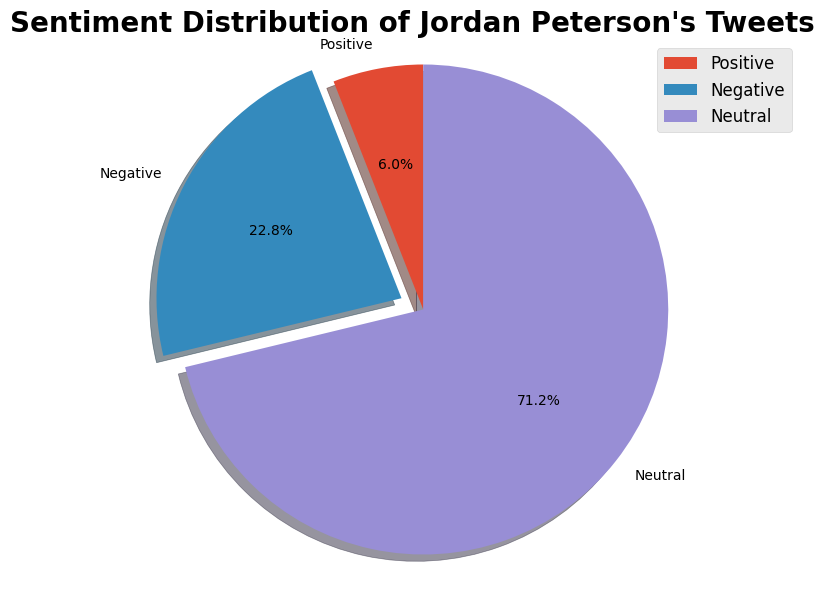

In [15]:
#@title
sentiment_counts = [positive_tweets, negative_tweets, neutral_tweets]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
explode = (0, 0.1, 0)

# Create a pie chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title("Sentiment Distribution of Jordan Peterson's Tweets", fontsize=20, fontweight='bold')
plt.axis('equal')  # Ensures the pie chart is a circle

# Customize legend
plt.legend(sentiment_labels, loc='best', fontsize=12, frameon=True, framealpha=0.8)

# Show the pie chart
plt.show()

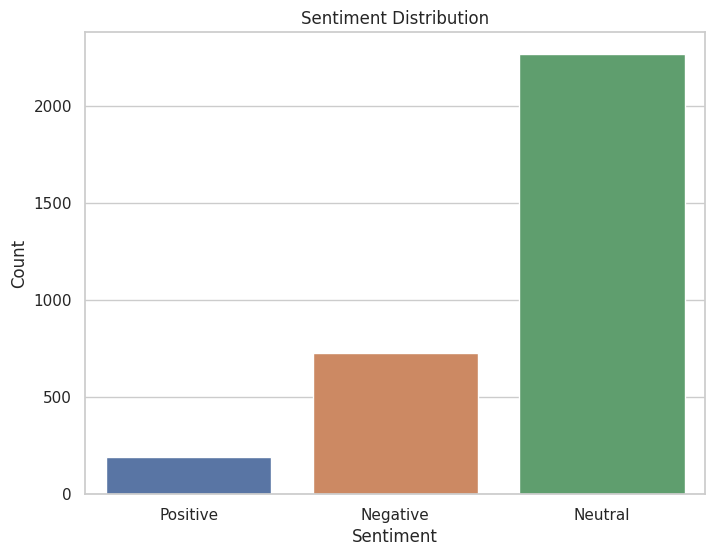

In [16]:
#@title
# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.barplot(x=sentiment_labels, y=sentiment_counts)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Show the bar chart
plt.show()

* Now, we will examine Dr. Jordan Peterson's top 50 most-liked tweets to identify the sentiment behind them and uncover any patterns or trends. We will categorize each tweet as negative, positive, or neutral based on its tone and message. By analyzing these results, we aim to understand the relationship between sentiment and popularity in Dr. Peterson's Twitter presence and discover the aspects of his communication style and topics that resonate most with his audience. This exploration could offer insights into the dynamics of social media engagement and the role of emotions in shaping online interactions.

In [19]:
#@title
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    label = result['label']
    if label == 'LABEL_0':
        return 'Negative'
    elif label == 'LABEL_1':
        return 'Neutral'
    else:
        return 'Positive'

top_50_tweets = df.sort_values(by='likes', ascending=False).head(50)
top_50_tweets['sentiment'] = top_50_tweets['text'].apply(classify_sentiment)
print(top_50_tweets[['text', 'likes', 'sentiment']])

                                                   text   likes sentiment
524        He should be jailed. https://t.co/8S28aeVxYp  151323  Negative
1423  Toxic masculinity stopping water that just wan...  101697  Negative
2679  Hey @NyTimes @BBC @CBC @CBS this is what news ...   62954   Neutral
1678  Saving the planet\nOne African life at a time....   62173   Neutral
1279  Hey, progressives: how does it feel to be supp...   57450   Neutral
913                  :)\n:)\n:) https://t.co/0kvOAl2PPf   56329  Positive
2652  "Farming needs to stop..." https://t.co/PPxN51...   55575  Negative
2041  Twitter suit. The tie is composed of micro @el...   53620   Neutral
3009  Just think how utterly intolerable the world w...   52078  Negative
1377  Yeah... I don't think so, sweetheart. https://...   51417   Neutral
1230  Boycott @Nike now and permanently. There is no...   48363  Negative
2587  Woke ideology is what the incompetent use to d...   42773  Negative
473                     Prison. https:

* This tells us that most of his most liked tweets are indeed negative. The next code will tell us exactly how many are negative. 



In [20]:
#@title
# Get the count of each sentiment using value_counts()
sentiment_counts = top_50_tweets['sentiment'].value_counts()

# Print out the counts
print(f"Negative tweets: {sentiment_counts['Negative']}")
print(f"Neutral tweets: {sentiment_counts['Neutral']}")
print(f"Positive tweets: {sentiment_counts['Positive']}")

Negative tweets: 31
Neutral tweets: 14
Positive tweets: 5


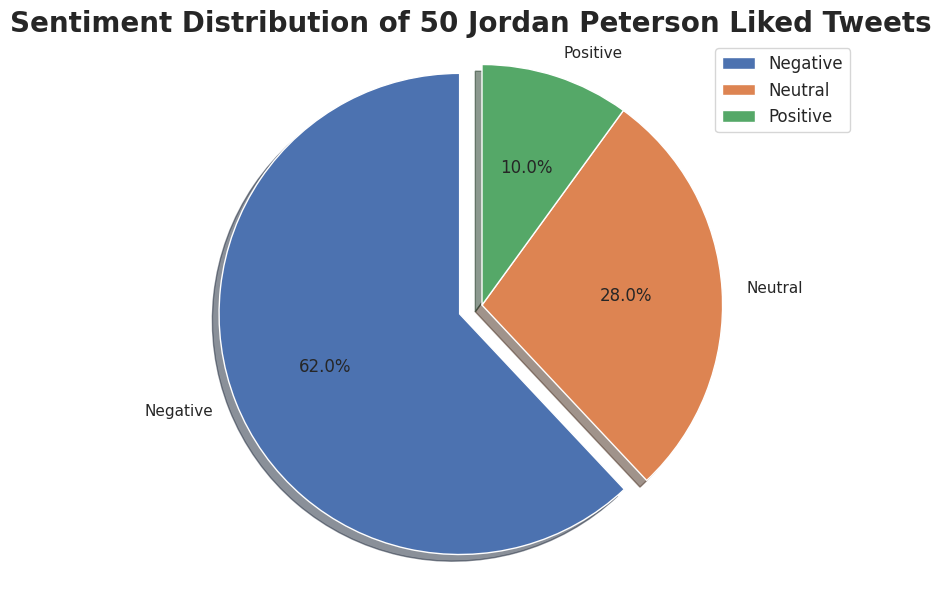

In [21]:
#@title
sentiment_labels = [sentiment_counts['Positive'], sentiment_counts['Negative'], sentiment_counts['Neutral']]
explode = (0.1, 0, 0)

# Create a pie chart using Seaborn
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Sentiment Distribution of 50 Jordan Peterson Liked Tweets', fontsize=20, fontweight='bold')
plt.axis('equal')
plt.legend(fontsize=12, frameon=True, framealpha=0.8)
plt.show()

* Interestingly, 62% of Jordan Peterson's most-liked tweets are negative, while only 10% are positive. This suggests that his audience is primarily drawn to his negative views. It can be argued that many followers may have feelings of hate, anger, sadness, upset or negativity, which Peterson addresses with an "intellectual" stance, contributing to his online popularity.

## **Exploring the negative words** 

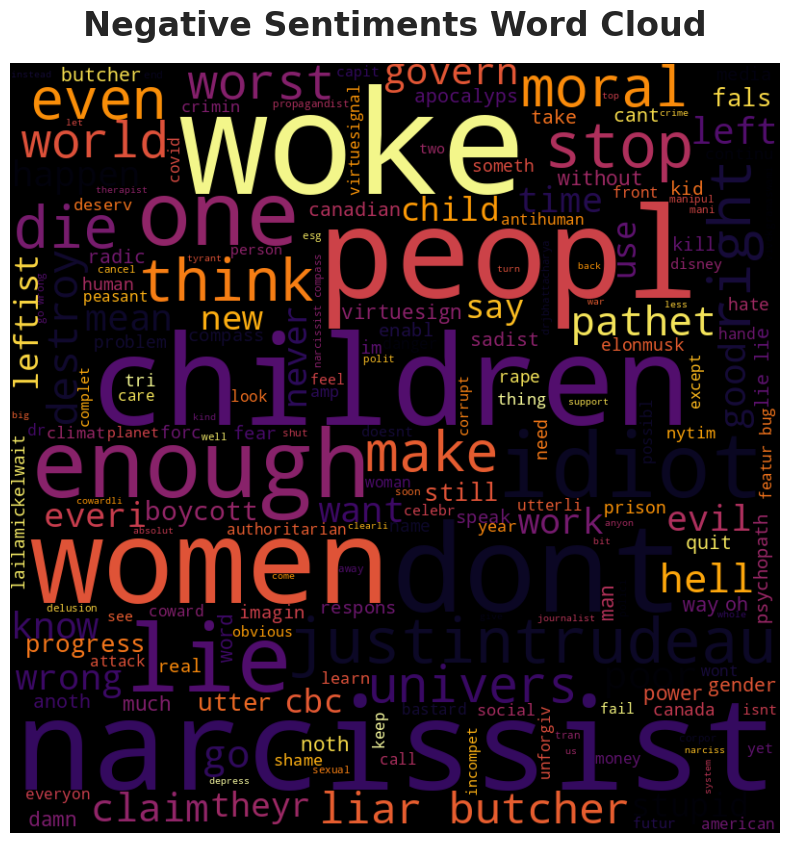

In [22]:
#@title
negative_tweets_df = text_df[text_df['sentiment'] == 'LABEL_0']

# Combine all the negative tweets into a single string
negative_tweets_text = ' '.join(tweet for tweet in negative_tweets_df['text'])

# Create a WordCloud object with custom settings
wordcloud = WordCloud(
    background_color='black',
    width=800,
    height=800,
    max_words=200,
    max_font_size=150,
    colormap='inferno',
    contour_width=3,
    contour_color='white',
).generate(negative_tweets_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiments Word Cloud', fontsize=24, fontweight='bold', pad=20)

# Show the word cloud
plt.show()

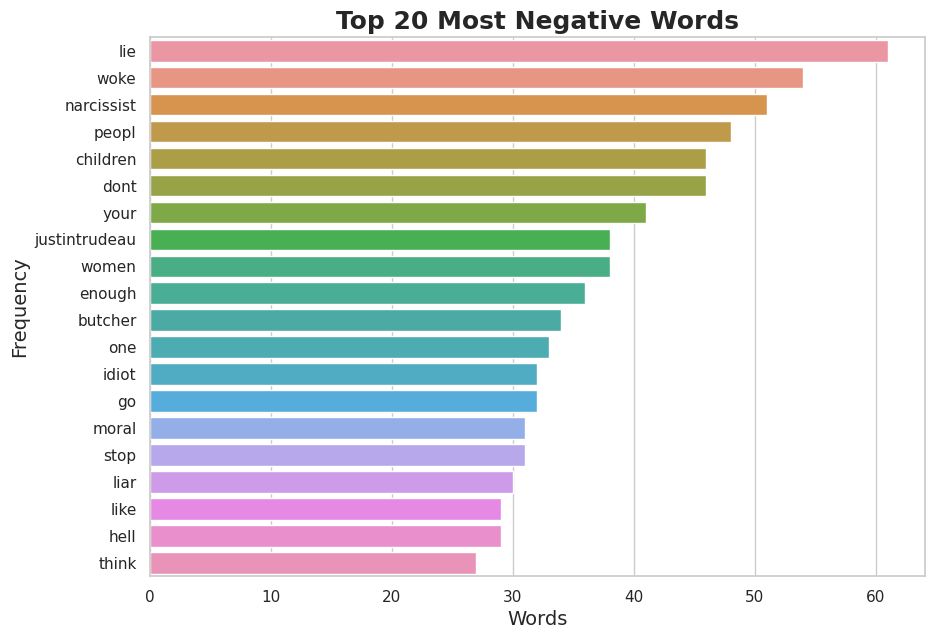

In [23]:
#@title
# Tokenize the negative tweets into individual words
negative_words = negative_tweets_text.split()

# Define the number of most frequent words to plot
k = 20

# Count the frequency of each word and sort them by frequency
word_freq = Counter(negative_words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:k]

# Extract the words and their frequencies from the sorted list
words = [word[0] for word in sorted_word_freq]
freqs = [word[1] for word in sorted_word_freq]

# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
sns.barplot(x=freqs, y=words)
plt.title(f"Top {k} Most Negative Words", fontsize=18, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the bar chart
plt.show()

* It's intriguing that Peterson often expresses discontent with groups like the "woke," "children," and "women" – those who are different from him. To better understand this, let's delve deeper into these particular groups and their relationship with his tweeted views.



## **"Woke"**

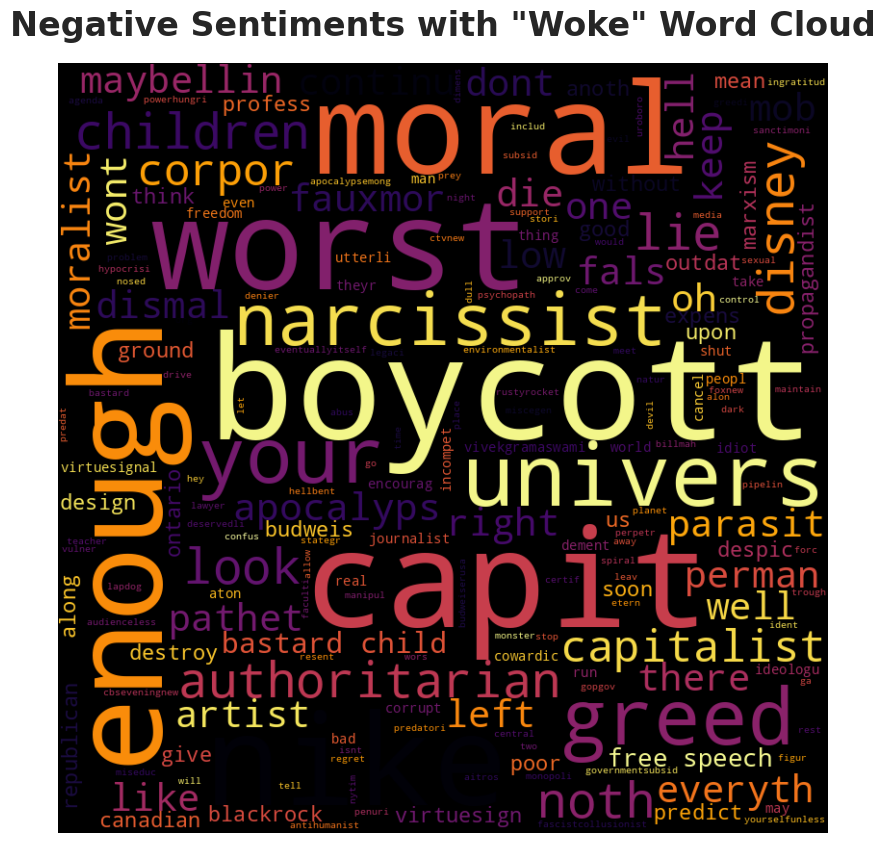

In [35]:
#@title
# Filter negative tweets containing the word "woke"
negative_tweets_woke_df = text_df[(text_df['sentiment'] == 'LABEL_0') & (text_df['text'].str.contains('woke'))]

# Combine all the negative tweets that contain the word "woke" into a single string
negative_tweets_woke_text = ' '.join(tweet for tweet in negative_tweets_woke_df['text'])

# Define the words to exclude from the word cloud
excluded_words = ['woke']

# Create a WordCloud object with custom settings and exclude the defined words
wordcloud_woke = WordCloud(
    background_color='black',
    width=800,
    height=800,
    max_words=200,
    max_font_size=150,
    colormap='inferno',
    contour_width=3,
    contour_color='white',
    stopwords=excluded_words,
).generate(negative_tweets_woke_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_woke, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiments with "Woke" Word Cloud', fontsize=24, fontweight='bold', pad=20)

# Show the word cloud
plt.show()


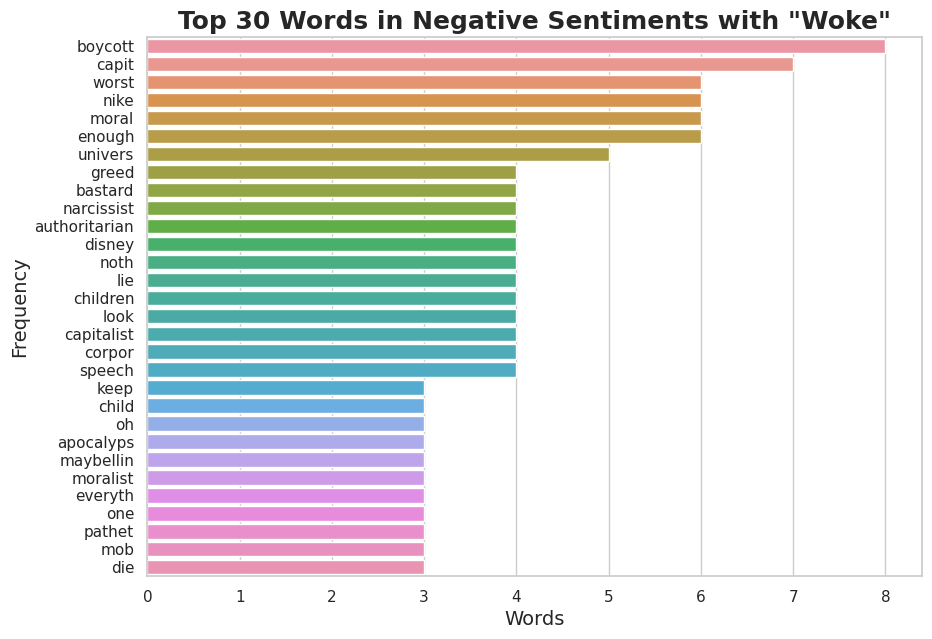

In [36]:
#@title
# Tokenize the combined negative tweets containing "woke" into individual words
tokens = word_tokenize(negative_tweets_woke_text)

# Filter out stopwords from the tokenized words including filtering out 'woke'
filtered_words = [word for word in tokens if word not in stop_words and word != 'woke']

# Count the frequency of each word and sort them by frequency
word_freq = Counter(filtered_words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the words and their frequencies from the sorted list
words = [word[0] for word in sorted_word_freq]
freqs = [word[1] for word in sorted_word_freq]

# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
sns.barplot(x=freqs[:30], y=words[:30])
plt.title("Top 30 Words in Negative Sentiments with \"Woke\"", fontsize=18, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the bar chart
plt.show()

## **"Children"** 

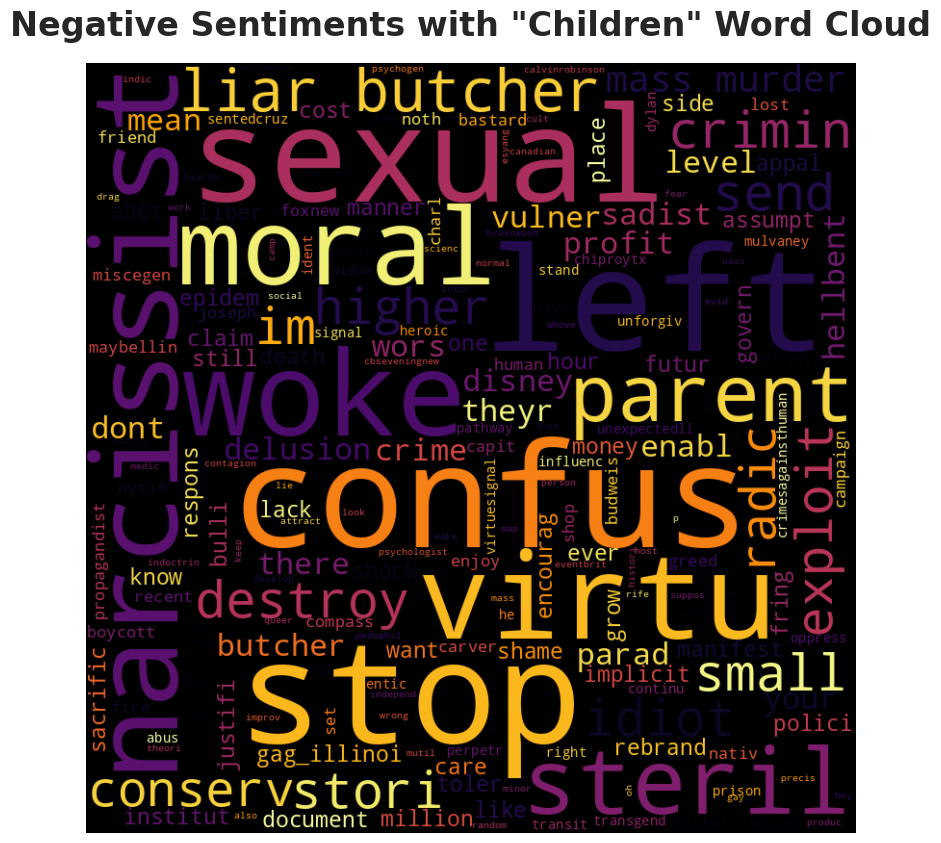

In [24]:
#@title
# Get only the negative tweets that contain the word "children"
negative_tweets_children_df = negative_tweets_df[negative_tweets_df['text'].str.contains('children')]

# Combine all the negative tweets that contain the word "children" into a single string
negative_tweets_children_text = ' '.join(tweet for tweet in negative_tweets_children_df['text'])

# Define the words to exclude from the word cloud
excluded_words = ['children']

# Create a WordCloud object with custom settings and exclude the defined words
wordcloud_children = WordCloud(
    background_color='black',
    width=800,
    height=800,
    max_words=200,
    max_font_size=150,
    colormap='inferno',
    contour_width=3,
    contour_color='white',
    stopwords=excluded_words,
).generate(negative_tweets_children_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_children, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiments with "Children" Word Cloud', fontsize=24, fontweight='bold', pad=20)

# Show the word cloud
plt.show()

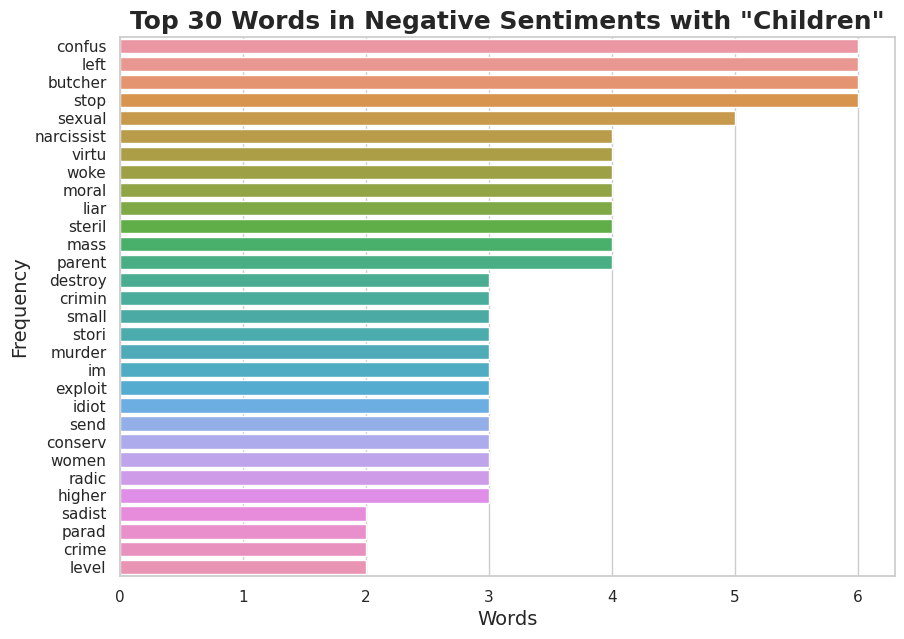

In [25]:
#@title
# Get only the negative tweets that contain the word "children"
negative_tweets_children_df = negative_tweets_df[negative_tweets_df['text'].str.contains('children')]

# Combine all the negative tweets that contain the word "children" into a single string
negative_tweets_children_text = ' '.join(tweet for tweet in negative_tweets_children_df['text'])

# Tokenize the combined negative tweets into individual words
tokens = word_tokenize(negative_tweets_children_text)

# Filter out stopwords from the tokenized words including filtering out 'children'
filtered_words = [word for word in tokens if word not in stop_words and word != 'children']

# Count the frequency of each word and sort them by frequency
word_freq = Counter(filtered_words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the words and their frequencies from the sorted list
words = [word[0] for word in sorted_word_freq]
freqs = [word[1] for word in sorted_word_freq]

# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
sns.barplot(x=freqs[:30], y=words[:30])
plt.title("Top 30 Words in Negative Sentiments with \"Children\"", fontsize=18, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the bar chart
plt.show()

* Interestingly, Peterson's most frequent negative tweets feature words like "confusion," "stop," "left," "sterilize," and more. Given our knowledge of Peterson and the data, it appears he may be discussing trans children, preteens, and teens. Notably, he doesn't seem to express positive sentiments about them. Let's investigate if his top-liked negative tweets about children indeed focus on trans children, preteens, and teens.

In [29]:
#@title
# Add sentiment column to the original DataFrame
df['sentiment'] = text_df['sentiment']

# Filter negative tweets containing the word "children"
negative_tweets_children = df[(df['sentiment'] == 'LABEL_0') & (df['text'].str.contains('children', case=False))]

# Sort the DataFrame by the number of likes in descending order
top_20_liked_negative_tweets_children = negative_tweets_children.sort_values(by='likes', ascending=False).head(20)

# Print the top 20 rows of the sorted DataFrame
top_20_liked_negative_tweets_children[['text', 'likes']]

,text,likes
778,Oh look. The science indicates that there is n...,19387
549,Dylan Mulvaney is not a transgender influence...,18081
1856,Narcissistic exploitation of children celebrat...,14269
2207,To convince themselves of their moral virtue (...,12676
1862,"""Grown-men-in female-lingerie-reading-to-child...",11526
1379,= sterilize and mutilate precisely those child...,10563
1415,I'm shocked. Shocked I say. @CBS have you no s...,9304
1898,More virtue-signaling from the idiot left. Whe...,9131
2512,Feature Not Bug: a billion starving women and ...,4966
2270,An epidemic of involuntary childlessness: 50%...,3883


* As anticipated, a significant portion of Peterson's most-liked negative tweets focus on trans children, preteens, and teens. Additionally, some of these tweets address trans individuals or drag queens engaging with children through activities like reading or dancing.

## **"Women"**

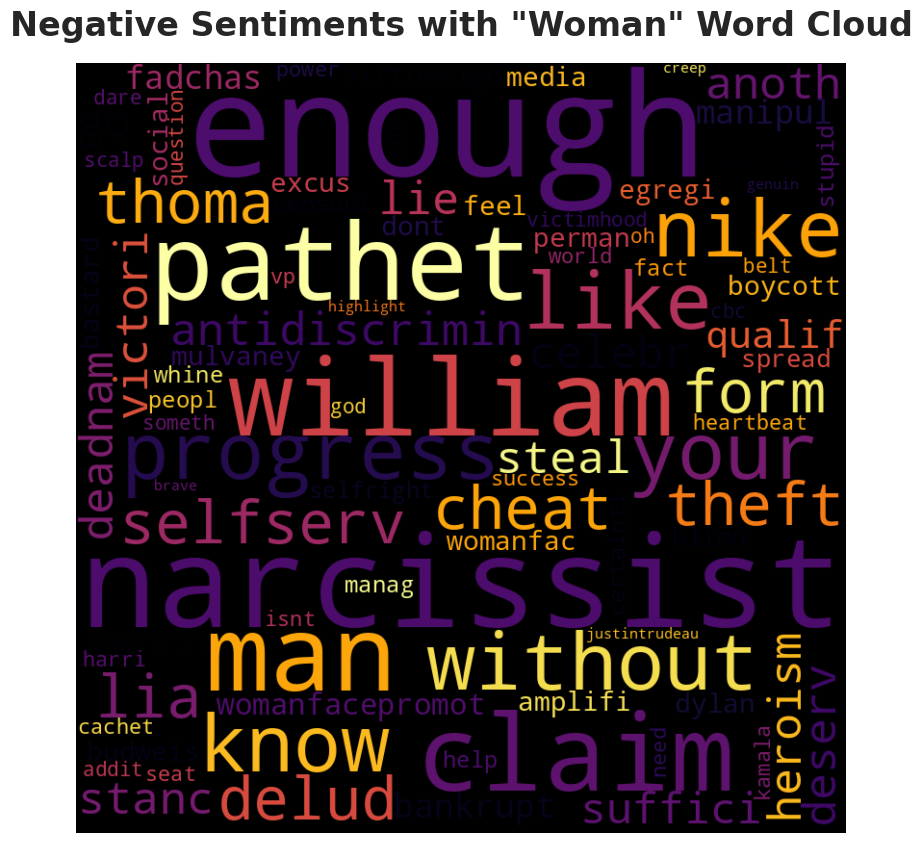

In [30]:
#@title
# Filter negative tweets containing the word "woman"
negative_tweets_woman_df = negative_tweets_df[negative_tweets_df['text'].str.contains('woman')]

# Combine all the negative tweets that contain the word "woman" into a single string
negative_tweets_woman_text = ' '.join(tweet for tweet in negative_tweets_woman_df['text'])

# Define the words to exclude from the word cloud
excluded_words = ['woman']

# Create a WordCloud object with custom settings and exclude the defined words
wordcloud_woman = WordCloud(
    background_color='black',
    width=800,
    height=800,
    max_words=200,
    max_font_size=150,
    colormap='inferno',
    contour_width=3,
    contour_color='white',
    stopwords=excluded_words,
).generate(negative_tweets_woman_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_woman, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiments with "Woman" Word Cloud', fontsize=24, fontweight='bold', pad=20)

# Show the word cloud
plt.show()

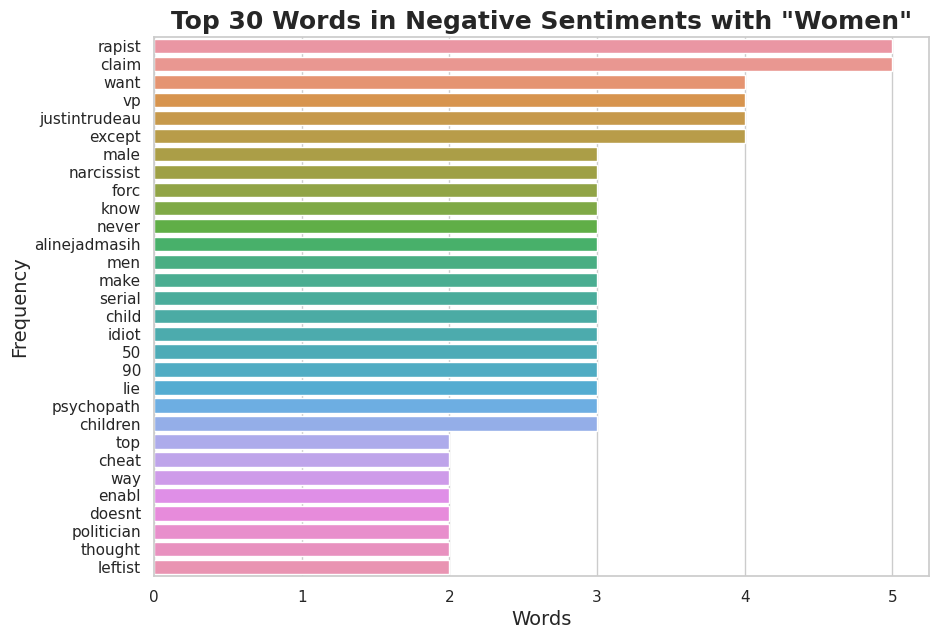

In [31]:
#@title
# Filter negative tweets containing the word "women"
negative_tweets_women_df = negative_tweets_df[negative_tweets_df['text'].str.contains('women')]

# Combine all the negative tweets that contain the word "women" into a single string
negative_tweets_women_text = ' '.join(tweet for tweet in negative_tweets_women_df['text'])

# Tokenize the combined negative tweets into individual words
tokens = word_tokenize(negative_tweets_women_text)

# Filter out stopwords from the tokenized words including filtering out 'women'
filtered_words = [word for word in tokens if word not in stop_words and word != 'women']

# Count the frequency of each word and sort them by frequency
word_freq = Counter(filtered_words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the words and their frequencies from the sorted list
words = [word[0] for word in sorted_word_freq]
freqs = [word[1] for word in sorted_word_freq]

# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
sns.barplot(x=freqs[:30], y=words[:30])
plt.title("Top 30 Words in Negative Sentiments with \"Women\"", fontsize=18, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the bar chart
plt.show()

In [32]:
#@title
# Filter negative tweets containing the word "women"
negative_tweets_women = df[(df['sentiment'] == 'LABEL_0') & (df['text'].str.contains('women', case=False))]

# Sort the DataFrame by the number of likes in descending order
top_20_liked_negative_tweets_women = negative_tweets_women.sort_values(by='likes', ascending=False).head(20)

# Print the top 20 rows of the sorted DataFrame
top_20_liked_negative_tweets_women[['text', 'likes']]

,text,likes
1601,50% of 30 year old women are childless. Half o...,14162
113,"He's 6'4"". He wasn't a top male swimmer, ranki...",11719
525,Lia Thomas is not a her. He is a narcissistic ...,11237
2441,@JustinTrudeau Customary obeisance to the radi...,6036
1273,Men do make the best women... another award-wi...,5209
2512,Feature Not Bug: a billion starving women and ...,4966
2270,An epidemic of involuntary childlessness: 50%...,3883
1860,God help such women. The devouring mother in h...,3763
2440,@JustinTrudeau @VP And if all you women readin...,3281
1874,"""Believe all women."" Addendum: except for the ...",3183


* The majority of Peterson's most-liked negative tweets are centered around trans women.



### **Exploring the positive words**

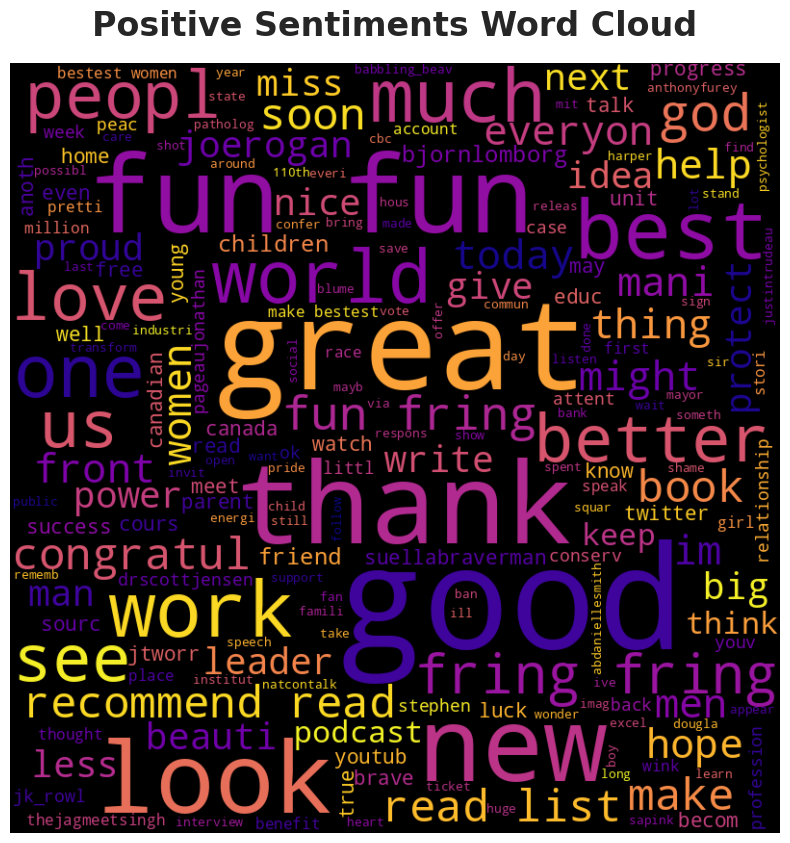

In [33]:
#@title
positive_tweets_df = text_df[text_df['sentiment'] == 'LABEL_2']

# Combine all the positive tweets into a single string
positive_tweets_text = ' '.join(tweet for tweet in positive_tweets_df['text'])

# Create a WordCloud object with custom settings
wordcloud = WordCloud(
    background_color='black',
    width=800,
    height=800,
    max_words=200,
    max_font_size=150,
    colormap='plasma',
    contour_width=3,
    contour_color='white',
).generate(positive_tweets_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiments Word Cloud', fontsize=24, fontweight='bold', pad=20)

# Show the word cloud
plt.show()

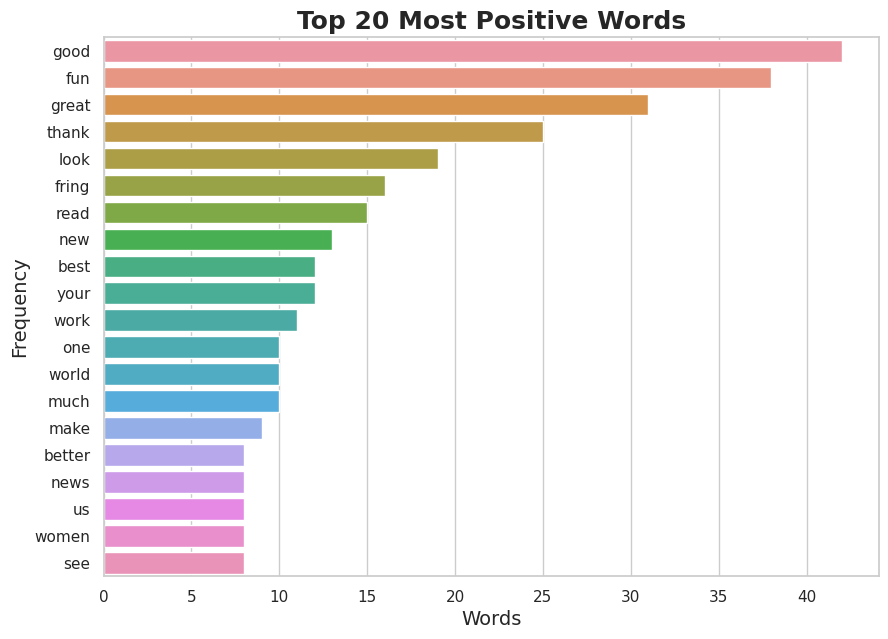

In [34]:
#@title
# Tokenize the positive tweets into individual words
positive_words = positive_tweets_text.split()

# Define the number of most frequent words to plot
k = 20

# Count the frequency of each word and sort them by frequency
word_freq = Counter(positive_words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:k]

# Extract the words and their frequencies from the sorted list
words = [word[0] for word in sorted_word_freq]
freqs = [word[1] for word in sorted_word_freq]

# Create a bar chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
sns.barplot(x=freqs, y=words)
plt.title(f"Top {k} Most Positive Words", fontsize=18, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the bar chart
plt.show()

## More to come....